In [1]:
import sklearn
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.utils.multiclass import unique_labels
import pandas as pd
import numpy as np
# from keras.preprocessing import text, sequence
# from keras import layers, models, optimizers
import matplotlib.pyplot as plt


In [2]:
train_data = 'data/DSL-TRAIN.txt'
dev_data = 'data/DSL-DEV.txt'

In [3]:
columns = ['Text', 'Language']
df_train = pd.read_csv(train_data, header=None, index_col=False, sep=r'\t', encoding="utf-8")
df_train.columns = columns

C:\Users\FRIDAY\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [4]:
df_dev = pd.read_csv(dev_data, header=None, index_col=False, sep=r'\t', encoding="utf-8")
df_dev.columns = columns

C:\Users\FRIDAY\Anaconda3\envs\spacy\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
X_train = df_train['Text']
Y_train = df_train['Language']
X_dev = df_dev['Text']
Y_dev = df_dev['Language']
classes = list(df_train['Language'].unique())

In [6]:
encoder = preprocessing.LabelEncoder()
Y_train = encoder.fit_transform(Y_train)
Y_dev = encoder.fit_transform(Y_dev)

In [7]:
def train_model(classifier, train_vectors, train_labels, valid_vectors, Y_dev, is_neural_net=False):
    classifier.fit(train_vectors, train_labels)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(valid_vectors)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, Y_dev)

In [8]:
def show_cm(classifier, train_vectors, train_labels, valid_vectors, Y_dev):
    classifier.fit(train_vectors, train_labels)
    predictions = classifier.predict(valid_vectors)
    return plot_confusion_matrix(Y_dev, predictions, classes, normalize=True, cmap=plt.cm.Blues)

In [9]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    fig, ax = plt.subplots()
    fig.set_size_inches(10,10)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

        # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


In [10]:
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(X_train)
X_train_count =  count_vect.transform(X_train)
X_dev_count =  count_vect.transform(X_dev)

In [11]:
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_count, Y_train, X_dev_count)
print("NB, Count Vectors: ", accuracy)

NB, Count Vectors:  0.8841785714285715


In [12]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}')
tfidf_vect.fit(X_train)
X_train_tfidf =  tfidf_vect.transform(X_train)
X_dev_tfidf =  tfidf_vect.transform(X_dev)

In [13]:
accuracy = train_model(naive_bayes.MultinomialNB(), X_train_tfidf, Y_train, X_dev_tfidf, Y_dev)
print("NB, Word-Level TF-IDF: ", accuracy)

NB, Word-Level TF-IDF:  0.8813214285714286


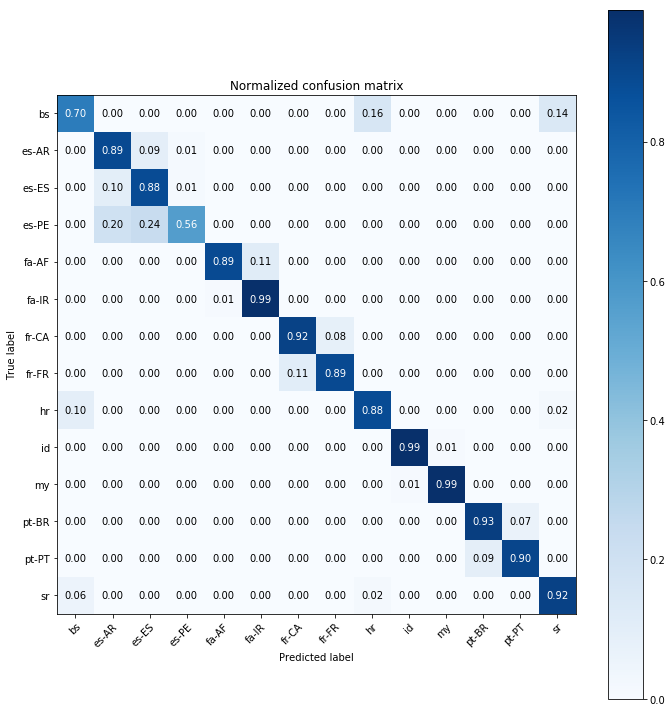

In [14]:
cm = show_cm(naive_bayes.MultinomialNB(), X_train_tfidf, Y_train, X_dev_tfidf, Y_dev)
plt.show()

In [15]:
import time

In [16]:
num_chars = [(1,1),(2,2),(3,3),(4,4),(5,5)]
# character level tf-idf
for i, num in enumerate(num_chars):
    print("num_chars = ", i+1)
    start = time.time()
    tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=num)
    tfidf_vect_ngram_chars.fit(X_train)
    X_train_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
    X_dev_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_dev)
    accuracy = train_model(naive_bayes.MultinomialNB(), X_train_tfidf_ngram_chars, Y_train, X_dev_tfidf_ngram_chars, Y_dev)
    print("NB, Char-Level TF-IDF with num_chars = ", i+1, ": ", accuracy, "time taken: ", time.time()-start)

num_chars =  1
NB, Char-Level TF-IDF with num_chars =  1 :  0.6026785714285714 time taken:  25.899799346923828
num_chars =  2
NB, Char-Level TF-IDF with num_chars =  2 :  0.7564285714285715 time taken:  61.30961751937866
num_chars =  3
NB, Char-Level TF-IDF with num_chars =  3 :  0.8398571428571429 time taken:  81.3243625164032
num_chars =  4
NB, Char-Level TF-IDF with num_chars =  4 :  0.8505357142857143 time taken:  102.76676344871521
num_chars =  5
NB, Char-Level TF-IDF with num_chars =  5 :  0.8535 time taken:  134.1709268093109


In [17]:
Y_train

array([ 0,  0,  0, ..., 13, 13, 13])

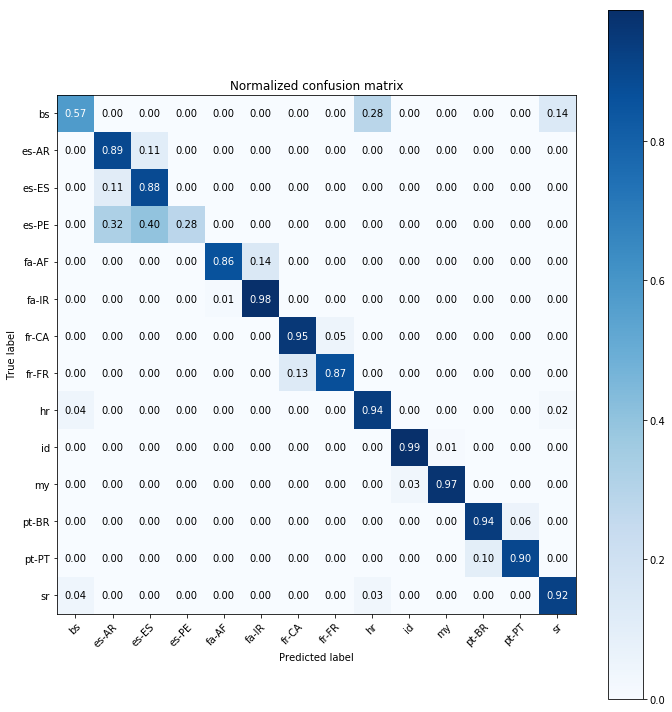

In [18]:
classifier = naive_bayes.MultinomialNB()
classifier.fit(X_train_tfidf_ngram_chars, Y_train)
predictions = classifier.predict(X_dev_tfidf_ngram_chars)
sklearn.metrics.confusion_matrix (Y_dev, predictions, labels=None, sample_weight=None)
cm = plot_confusion_matrix(Y_dev, predictions, classes, normalize=True, cmap=plt.cm.Blues)

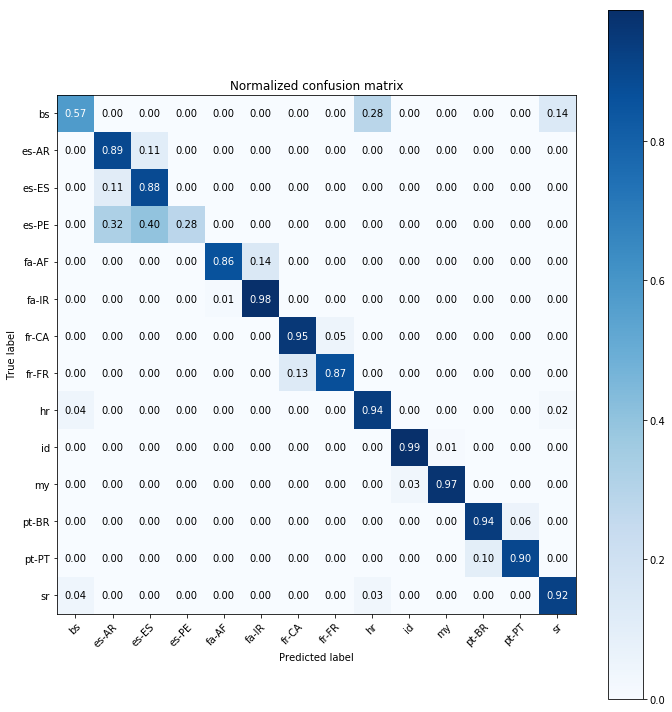

In [19]:
classes = list(df_train['Language'].unique())
cm = plot_confusion_matrix(Y_dev, predictions, classes, normalize=True, cmap=plt.cm.Blues)

In [22]:
df_train.shape

(252000, 2)